In [1]:
from arch.Mosiac import Mosiac_Layer, RGGB_Layer
import torch
import torch.nn as nn
import numpy as np
from hsi_io import load_envi_img
from pathlib import Path
import scipy.io as sio
import matplotlib.pyplot as plt
import interplot

In [2]:
tgt_wl = np.arange(400,1005,5)

RGB_mat = sio.loadmat(r'D:\zf-py\hsi\results\RGB.mat')
wl = RGB_mat['wavelength'][0]
Phi = np.zeros([3,len(wl)])
for idx,c in enumerate(['R','G','B']):
    Phi[idx,:] = RGB_mat[c][0]

down_mat = interplot.downsampling_matrix(wl,tgt_wl)
Phi = interplot.apply_sampling_matrix(Phi,down_mat)
Phi = torch.from_numpy(Phi).float()

In [3]:
Phi.max()

tensor(1.0002)

In [4]:
hdr_img = load_envi_img(r"D:\20231225_F2.8\D_20231225_162028.hdr")
img = hdr_img.load()
owl = np.array(hdr_img.metadata['wavelength'],dtype=np.float32)

sampling_mat = interplot.upsampling_matrix(owl,wl) @ down_mat
img = interplot.apply_sampling_matrix(img,sampling_mat,backend='torch')

img = torch.from_numpy(img).unsqueeze(0)

In [14]:
rggb_layer = RGGB_Layer()

# add extra dimension for batch
print(img.shape)
rggb_img = rggb_layer(img, Phi)
rgb_img = rggb_layer.multi_channel(img, Phi)
rgb_img /= rgb_img.max()

torch.Size([1, 1200, 1300, 121])


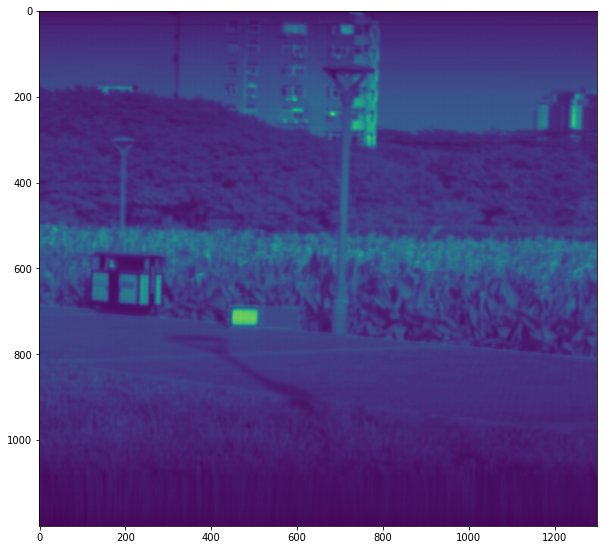

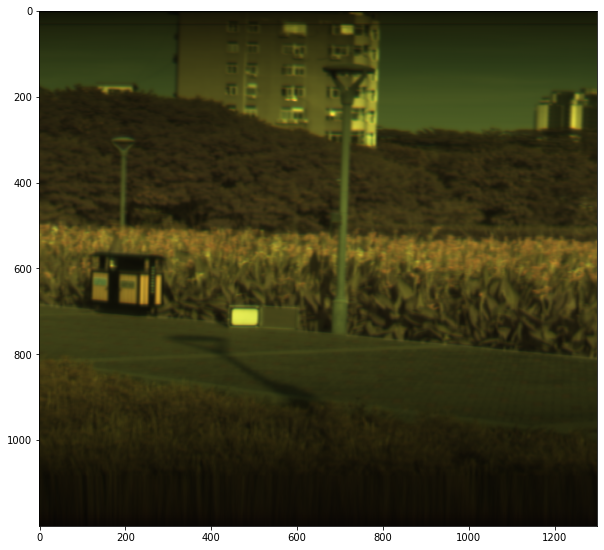

In [15]:
plt.figure(figsize=(10,10))
plt.imshow(rggb_img[0].numpy())
plt.show()
plt.imsave('results/rggb.png',rggb_img[0].numpy())
plt.figure(figsize=(10,10))
plt.imshow(rgb_img[0].numpy())
plt.show()
